In [1]:
import os
import json
import torch
import numpy as np
import matplotlib.pyplot as plt
# top_logprobs
import sys 
sys.path.append("/home/flowers/work/OpenELM")
from heritability import main
from sklearn.linear_model import LinearRegression


/home/flowers/miniconda3/envs/codegpt/lib/python3.10/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


In [2]:
import json
path_puzz="/home/flowers/work/OpenELM/analysis_P3/heritability/puzzle.json"
with open(path_puzz, 'r') as f:
    puz=json.load(f)


In [26]:
import matplotlib.pyplot as plt

def plot_res(data):
    alpha = 0.5
    # Determine the range of data to be plotted
    data_min = min(min(data['embedding_similarity']), min(data['embedding_similarity_scrambled']))
    data_max = max(max(data['embedding_similarity']), max(data['embedding_similarity_scrambled']))
    
    # Choose the number of bins or specify the bin edges
    bins = np.linspace(data_min, data_max, 80)  # 10 bins across the full range of data

    plt.hist(data['embedding_similarity'], bins=bins, alpha=alpha, label='original-mutated')
    plt.hist(data['embedding_similarity_scrambled'], bins=bins, alpha=alpha, label='random-mutated')
    plt.xlim(0.4, 1.0)
    plt.xlabel('Cosine sim')
    plt.ylabel('Count')
    plt.legend()
    plt.title('Cosine similarity between original and mutated embeddings,\n and between random puzzle and mutated embeddings')
    plt.show()


    old_fit=data["quality_correlation"]["original_fitness"]
    new_fit=data["quality_correlation"]["new_fitness"]
    plt.scatter(old_fit, new_fit)
    plt.xlabel("Original Fitness")
    plt.ylabel("New Fitness")
    plt.title("Fitness Correlation")
    # remove inf values do this step
    X = np.array(old_fit).reshape(-1,1)
    y = np.array(new_fit).reshape(-1,1)
    finite_mask = np.isfinite(X) & np.isfinite(y)
    print(f"is infinite {np.isfinite(y).sum()}/{len(y)}")
    X = X[finite_mask].reshape(-1,1)
    y = y[finite_mask].reshape(-1,1)

    reg = LinearRegression().fit(X, y)
    plt.plot(X, reg.predict(X), color='red', linewidth=3,label=f"y={reg.coef_[0][0]:.2f}x+{reg.intercept_[0]:.2f}")
    plt.title(f"Fitness Correlation R2={reg.score(X,y):.6f}")
    plt.legend()
    plt.show()


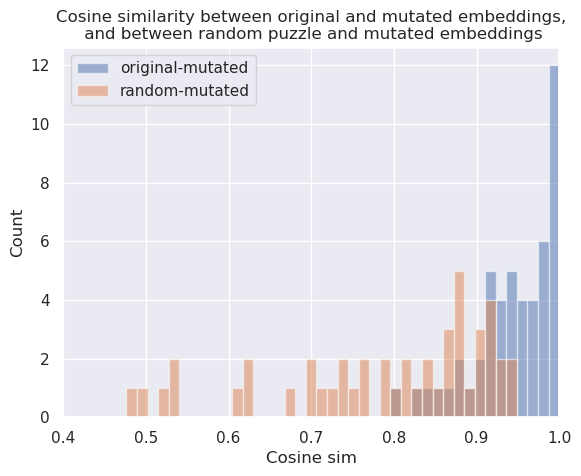

is infinite 32/50


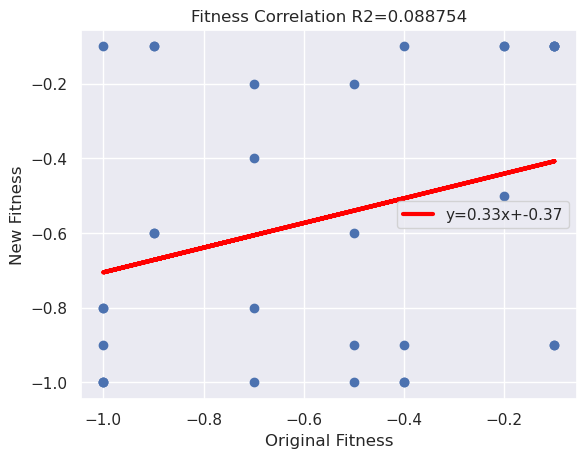

In [27]:
path_res="/home/flowers/work/OpenELM/analysis_P3/heritability/heritability_metrics.json"
with open(path_res, "r") as f:
    metric_dict=json.load(f)
plot_res(metric_dict)


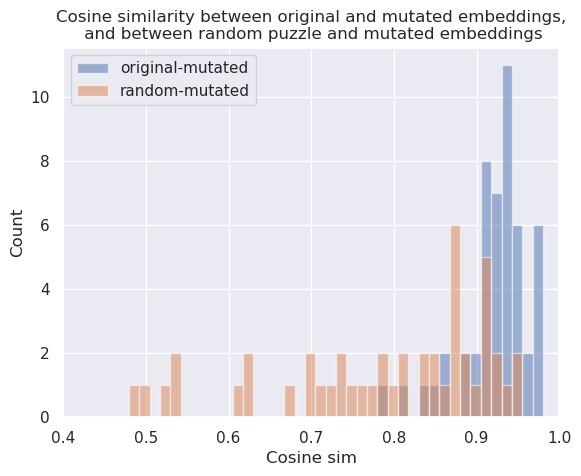

is infinite 32


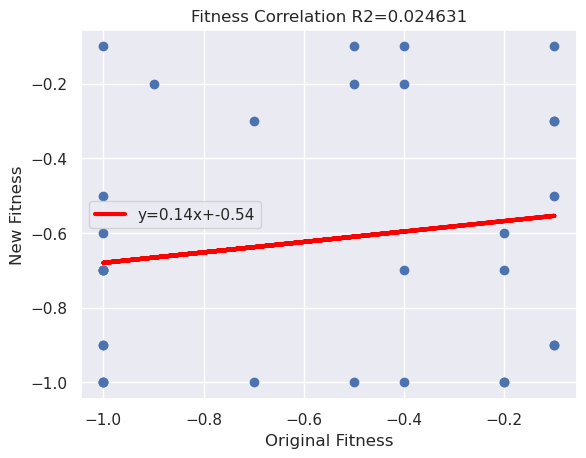

In [25]:
path_res="/home/flowers/work/OpenELM/analysis_P3/heritability/heritability_metrics_aces.json"
with open(path_res, "r") as f:
    metric_dict=json.load(f)
plot_res(metric_dict)

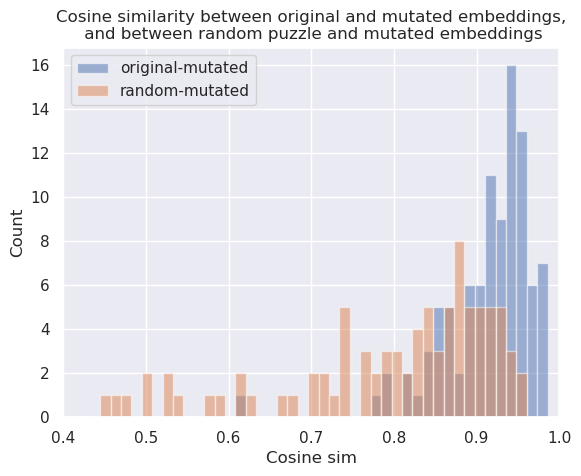

is infinite 54/96


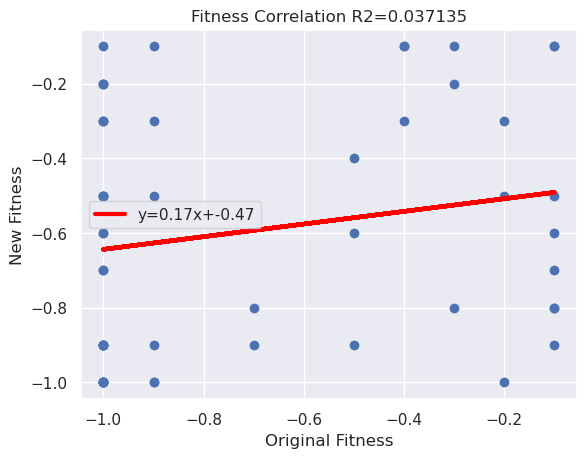

In [28]:
path_res="/home/flowers/work/OpenELM/analysis_P3/heritability/heritability_metrics_aces.json"
with open(path_res, "r") as f:
    metric_dict=json.load(f)
plot_res(metric_dict)

In [27]:
120/17

7.0588235294117645

In [ ]:
# show puzzle
list_path_puzz="/home/flowers/work/OpenELM/analysis_P3/heritability/puzzle.json"
with open(list_path_puzz, 'r') as f:
    list_puz=json.load(f)


old_gen=list_puz["old_genomes"]
new_gen=list_puz["new_genomes"]
metrics=list_puz["metric_dict"]['embedding_similarity']
for i in range(len(old_gen)):
    print("\n=============\n")
    print(f"Puzzle {i}: similarity={metrics[i]}")
    print(f"Old (fitness= {old_gen[i]['fitness']}):\n {old_gen[i]['program_str']}")
    print(f"-----\nNew (fitness= {new_gen[i]['fitness']}):\n {new_gen[i]['program_str']}")
    print("\n\n")

In [11]:
from transformers import AutoTokenizer, AutoModel
model_id="/home/flowers/work/hf/deepseek-coder-1.3b-base"
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModel.from_pretrained(model_id)
model.to(device)
model.eval()

/home/flowers/miniconda3/envs/codegpt/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


LlamaModel(
  (embed_tokens): Embedding(32256, 2048)
  (layers): ModuleList(
    (0-23): 24 x LlamaDecoderLayer(
      (self_attn): LlamaAttention(
        (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
        (k_proj): Linear(in_features=2048, out_features=2048, bias=False)
        (v_proj): Linear(in_features=2048, out_features=2048, bias=False)
        (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
        (rotary_emb): LlamaLinearScalingRotaryEmbedding()
      )
      (mlp): LlamaMLP(
        (gate_proj): Linear(in_features=2048, out_features=5504, bias=False)
        (up_proj): Linear(in_features=2048, out_features=5504, bias=False)
        (down_proj): Linear(in_features=5504, out_features=2048, bias=False)
        (act_fn): SiLU()
      )
      (input_layernorm): LlamaRMSNorm()
      (post_attention_layernorm): LlamaRMSNorm()
    )
  )
  (norm): LlamaRMSNorm()
)

In [4]:
120

5.0

In [20]:
[1,2,3,4][-3:]

[2, 3, 4]

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

model_id = "/home/flowers/work/hf/deepseek-coder-1.3b-base"

t = AutoTokenizer.from_pretrained(model_id)
m = AutoModelForCausalLM.from_pretrained(model_id, torch_dtype="auto",device_map="auto")
m.eval()

In [3]:



texts = ["""
def f(UniqueCharString: str) -> bool:
    return len(set(UniqueCharString)) == len(UniqueCharString)
""",
"""
def f(prime_sum: int) -> bool:
    def is_prime(num):
        if num < 2:
            return False
        for i in range(2, int(num**0.5) + 1):
            if num % i == 0:
                return False
        return True
"""]
t_input = t(texts, padding=True, truncation=False, return_tensors="pt").to(m.device)


with torch.no_grad():
    last_hidden_state = m(**t_input, output_hidden_states=True).hidden_states[-1]


weights_for_non_padding = t_input.attention_mask * torch.arange(start=1, end=last_hidden_state.shape[1] + 1,device=m.device).unsqueeze(0)
# equal_weights_for_padding = t_input.attention_mask *  torch.ones_like(torch.arange(start=1, end=last_hidden_state.shape[1] + 1).unsqueeze(0)) 
sum_embeddings = torch.sum(last_hidden_state * weights_for_non_padding.unsqueeze(-1), dim=1)
num_of_none_padding_tokens = torch.sum(weights_for_non_padding, dim=-1).unsqueeze(-1)
sentence_embeddings = sum_embeddings / num_of_none_padding_tokens

print(t_input.input_ids)
print(weights_for_non_padding)
print(num_of_none_padding_tokens)
print(sentence_embeddings.shape)


tensor([[32014, 32014, 32014, 32014, 32014, 32014, 32014, 32014, 32014, 32014,
         32014, 32014, 32014, 32014, 32014, 32014, 32014, 32014, 32014, 32014,
         32014, 32014, 32014, 32014, 32014, 32014, 32014, 32014, 32014, 32014,
         32014, 32014, 32014, 32014, 32014, 32014, 32013,   185,  1551,   267,
             7,  2826,  2710,  8061,  2005,    25,  1401,     8,   567,    29,
          6921,    25,   185,   315,   967, 10405,     7,  1113,     7,  2826,
          2710,  8061,  2005,  1435,  2312, 10405,     7,  2826,  2710,  8061,
          2005,     8,   185],
        [32013,   185,  1551,   267,     7,  6621,    62,  1828,    25,  1097,
             8,   567,    29,  6921,    25,   185,   315,   972,   317,    62,
          6621,     7,  6487,  1772,   185,   436,   562,  1181,  8086,    17,
            25,   185,   655,   967, 14729,   185,   436,   327,   460,   279,
          3160,     7,    17,    11,  1097,     7,  6487,   742,    15,    13,
            20,     8

In [5]:
cos=torch.nn.CosineSimilarity(dim=1, eps=1e-6)
res=cos(sentence_embeddings[:1], sentence_embeddings[1:])


tensor([0.9297], device='cuda:0', dtype=torch.bfloat16)

In [29]:
t_input = t(texts, padding=True, truncation=False, return_tensors="pt").to(device)


with torch.no_grad():
    last_hidden_state = m(**t_input, output_hidden_states=True).hidden_states[-1]


# weights_for_non_padding = t_input.attention_mask * torch.arange(start=1, end=last_hidden_state.shape[1] + 1).unsqueeze(0) # more weight on last tokens
equal_weights_for_padding = t_input.attention_mask *  torch.ones_like(torch.arange(start=1, end=last_hidden_state.shape[1] + 1).unsqueeze(0)) 
sum_embeddings = torch.sum(last_hidden_state * weights_for_non_padding.unsqueeze(-1), dim=1)
num_of_none_padding_tokens = torch.sum(weights_for_non_padding, dim=-1).unsqueeze(-1)
sentence_embeddings = sum_embeddings / num_of_none_padding_tokens

print(t_input.input_ids)
print(weights_for_non_padding)
print(num_of_none_padding_tokens)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument index in method wrapper_CUDA__index_select)

In [21]:
outs[0].shape

torch.Size([2, 10, 2048])

# check new test function


In [4]:
import json
path_puzz="/home/flowers/work/OpenELM/analysis_P3/heritability/selected_genomes_umap.json"
with open(path_puzz, 'r') as f:
    puz=json.load(f)

In [8]:
list_puz=[i["program_str"].split("assert f")[0]+"out=f(g())\nout" for i in puz]

In [16]:
import math
n=15
max_comb=5
sum([math.comb(n,k) for k in range(1,max_comb+1)])

4943

In [29]:
96*50/60

80.0

In [19]:
n=20 # number of topics
max_comb=4 
sum([math.comb(n,k) for k in range(1,max_comb+1)])

6195

In [26]:
1036/50

20.72

In [3]:
10*5 * 100

5000

In [1]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

model_id = "/home/flowers/work/hf/Llama-3-8B-Instruct-GPTQ-4-Bit"

t = AutoTokenizer.from_pretrained(model_id)
# m = AutoModelForCausalLM.from_pretrained(model_id, torch_dtype="auto",device_map="auto")
# m.eval()

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [7]:
messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "{prompt}"},
    {"role": "assistant", "content": "{response}"},
]

prompt = t.apply_chat_template(
        messages, 
        tokenize=False, 
        add_generation_prompt=False
)


In [18]:
from datasets import Dataset
new_dataset=[{"a":"aaaaaa"},{"a":"bbbbbbbb"},{"a":"cccccccc"},{"c":"dddddddd"}]
dat=Dataset.from_list(new_dataset)

In [25]:
30*50*4/60

100.0